In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [2]:
#These are the correspondences between the parameter names in the the simulation file and those in article
#CTE_IPTG is alpha_IPTG
# CTE_aTc is alpha_aTc
# A is A_L
# B is B_L
# B2 is C_L
# C is D_L
# D is A_T
# E is B_T
# E2 is C_T
# F is D_T
# n is n_L
# m is n_T

In [3]:
def trajectory(initial_conditions,t_max,parameters):

    t = np.linspace(0,t_max,1000)

    result = odeint(model,initial_conditions,t,(parameters,))

    x_traj=result[:,0]
    y_traj=result[:,1]
   
    return x_traj,y_traj



In [4]:
def model(initial_conditions,t,parameters):
    
    x,y=initial_conditions
    
    dxdt,dydt=toggle(x,y,parameters)
    
    return dxdt,dydt

In [5]:
def toggle(X,Y,parameters):

    A,B,B2,C,D,E,E2,F,n,m=parameters
    
    dXdt= (A+B2*Y**n)/(1+B*Y**n) - C*X
    dYdt= (D+E2*X**m)/(1+E*X**m) - F*Y
    return dXdt,dYdt

In [6]:
def fixed_points_equation_toggle(X,parameters):
    A,B,B2,C,D,E,E2,F,n,m=parameters

    Y= (D+E2*X**m)/(F*(1+E*X**m))
    return (A+B2*Y**n)/(1+B*Y**n) - C*X

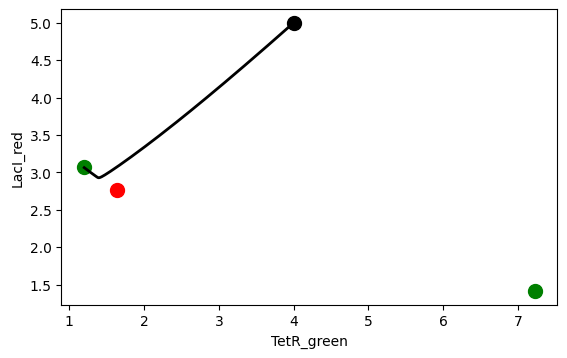

In [7]:
#we do not add inducers
CTE_IPTG=1
CTE_aTc=1

# #we add IPTG
# CTE_IPTG=0.1
# CTE_aTc=1

# #we add aTc
# CTE_IPTG=1
# CTE_aTc=0.1

A=5
B=0.1*CTE_IPTG
B2=0.01*CTE_IPTG
C=0.5

D=1.8
E=0.2*CTE_aTc
E2=0.12*CTE_aTc
F=0.5 #D_T

n=4
m=2

parameters=[A,B,B2,C,D,E,E2,F,n,m]

# specify range of variables
npts=2000
Xmin=0
Xmax=11
Ymin=0
Ymax=6
X= np.linspace(Xmin, Xmax, npts)
Y= np.linspace(Ymin, Ymax, npts)


# #direction arrows
# X_grid,Y_grid= np.meshgrid(X,Y)
# X_velocity,Y_velocity= toggle(X_grid,Y_grid,parameters)
# norm= np.sqrt(X_velocity**2 + Y_velocity**2)
# color=norm
# plt.streamplot(X_grid,Y_grid,X_velocity,Y_velocity,color=color,cmap ='cool',arrowsize=1,density=1,linewidth=2)
# # plt.colorbar()


# find fixed points using an initial guess
X0_1=fsolve(fixed_points_equation_toggle,0.4,parameters)[0]
X0_2=fsolve(fixed_points_equation_toggle,3.4,parameters)[0]
X0_3=fsolve(fixed_points_equation_toggle,8.4,parameters)[0]
Y0_1=(D+E2*X0_1**m)/(F*(1+E*X0_1**m))
Y0_2=(D+E2*X0_2**m)/(F*(1+E*X0_2**m))
Y0_3=(D+E2*X0_3**m)/(F*(1+E*X0_3**m))

plt.plot(X0_1,Y0_1,'go',markersize=10)
plt.plot(X0_2,Y0_2,'ro',markersize=10)
plt.plot(X0_3,Y0_3,'go',markersize=10)

plt.xlabel('TetR_green')
plt.ylabel('LacI_red')


#trajectories
t_max=100
X_0=4
Y_0=5

initial_conditions=[X_0,Y_0]
X_traj,Y_traj=trajectory(initial_conditions,t_max,parameters)
plt.plot(X_traj,Y_traj,'k',linewidth=2)
plt.plot(X_0,Y_0,'ko',markersize=10)

plt.gca().set_aspect(1)


### Noise curves

In [84]:
#function to calculate % cells that lost state B

def lost_stability(sigma_r):
    sigma=sigma_r/np.sqrt(2)
    
    #two points close
    X_0f=1.20
    Y_0f=3.07
    X_near_fixed_point=6
    
#     #two points far away
#     X_0f=0.4
#     Y_0f=3.4
#     X_near_fixed_point=8.4
    
    number_cells=1000
    t_max=100
    list_lost_stability=[]
    list_perturbation=[]

    for cell in np.arange(1,number_cells+1):
        for perturbation in np.arange(1,50+1): #perturbations per unit of time
            noise_x=np.random.normal(0,sigma)
            X_0=X_0f+noise_x
            if X_0<0: X_0=0
            noise_y=np.random.normal(0,sigma)
            Y_0=Y_0f+noise_y
            if Y_0<0: Y_0=0

            initial_conditions=[X_0,Y_0]
            X_traj,Y_traj=trajectory(initial_conditions,t_max,parameters)
            if X_traj[-1]>X_near_fixed_point:
                list_lost_stability.append(cell)
                break

        list_perturbation.append(perturbation)
    
    return len(list_lost_stability)/number_cells

In [98]:
# Two fixed points close
list_sigma_r_close=[]
list_lost_stability_close=[]
for sigma_r in np.arange(0,2,0.02):
    print(sigma_r)
    list_sigma_r_close.append(sigma_r)
    list_lost_stability_close.append(lost_stability(sigma_r))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.72
0.74
0.76
0.78
0.8
0.8200000000000001
0.84
0.86
0.88
0.9
0.92
0.9400000000000001
0.96
0.98
1.0
1.02
1.04
1.06
1.08
1.1
1.12
1.1400000000000001
1.16
1.18
1.2
1.22
1.24
1.26
1.28
1.3
1.32
1.34
1.36
1.3800000000000001
1.4000000000000001
1.42
1.44
1.46
1.48
1.5
1.52
1.54
1.56
1.58
1.6
1.62
1.6400000000000001
1.6600000000000001
1.68
1.7
1.72
1.74
1.76
1.78
1.8
1.82
1.84
1.86
1.8800000000000001
1.9000000000000001
1.92
1.94
1.96
1.98


In [85]:
# Two fixed points far away
list_sigma_r_faraway=[]
list_lost_stability_faraway=[]
for sigma_r in np.arange(0,2,0.02):
    print(sigma_r)
    list_sigma_r_faraway.append(sigma_r)
    list_lost_stability_faraway.append(lost_stability(sigma_r))

0.0
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.72
0.74
0.76
0.78
0.8
0.8200000000000001
0.84
0.86
0.88
0.9
0.92
0.9400000000000001
0.96
0.98
1.0
1.02
1.04
1.06
1.08
1.1
1.12
1.1400000000000001
1.16
1.18
1.2
1.22
1.24
1.26
1.28
1.3
1.32
1.34
1.36
1.3800000000000001
1.4000000000000001
1.42
1.44
1.46
1.48
1.5
1.52
1.54
1.56
1.58
1.6
1.62
1.6400000000000001
1.6600000000000001
1.68
1.7
1.72
1.74
1.76
1.78
1.8
1.82
1.84
1.86
1.8800000000000001
1.9000000000000001
1.92
1.94
1.96
1.98


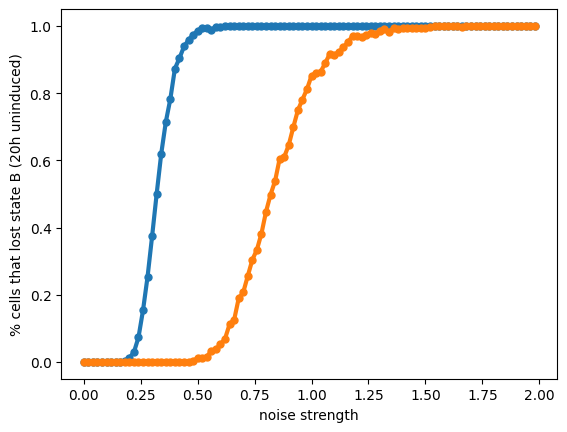

In [103]:
plt.plot(list_sigma_r_close,list_lost_stability_close,'.-',linewidth='3',markersize='10')
plt.plot(list_sigma_r_faraway,list_lost_stability_faraway,'.-',linewidth='3',markersize='10')
plt.xlabel('noise (a.u.)')
plt.ylabel('% cells that lost state B')